In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
import pandas as pd
import numpy as np
from utils import unify_coordinates_referential, init_logger, verify_dotenv_file
from utils import GOAL_POSITION
from feature_engineering import *

Loading .env file from c:\Users\Utilisateur\Documents\MILA\IFT 6758\IFT6758_NHL

In [2]:
data = pd.read_csv(Path(os.environ["DATA_FOLDER"], "2016_2020_data_f19a07b.csv"))

In [3]:
data = NHL_Feature_Engineering(
    df = data,
    distance_to_goal = True,
    angle_to_goal = True,
    is_goal = True,
    empty_net = True,
    verbose=True
)

data = data.df

2023-11-08 17:17:05.136 | INFO     | feature_engineering:__init__:25 - Calculations of distance/angle done w.r.t GOAL_POSITION = [89, 0]
2023-11-08 17:17:05.339 | INFO     | feature_engineering:_handle_na_values_for_coordinates_n_rinkside:65 - Found 376411 shots with coordinates and rinkSide specified.
2023-11-08 17:17:05.339 | INFO     | feature_engineering:_handle_na_values_for_coordinates_n_rinkside:70 - 
                Coordinates NA stats:
                    11418 shots without coordinates.
                    14 {97953, 25986, 105249, 44774, 121671, 114601, 114602, 114603, 114604, 114605, 48623, 230415, 275707, 60892} shots without X and Y coordinates.
                    2 {237987, 238493} shots without X coordinates.
                    1 {228391} shots without Y coordinates.
                
                RinkSide NA stats:
                    11401 shots without rinkSide specified (so can know to which goal they refer).
    
                GONNA SKIP THEM FOR DISTANCE/AN

# Histogramme du nombre de tirs (buts et non-buts séparés), regroupées (binned) par distance

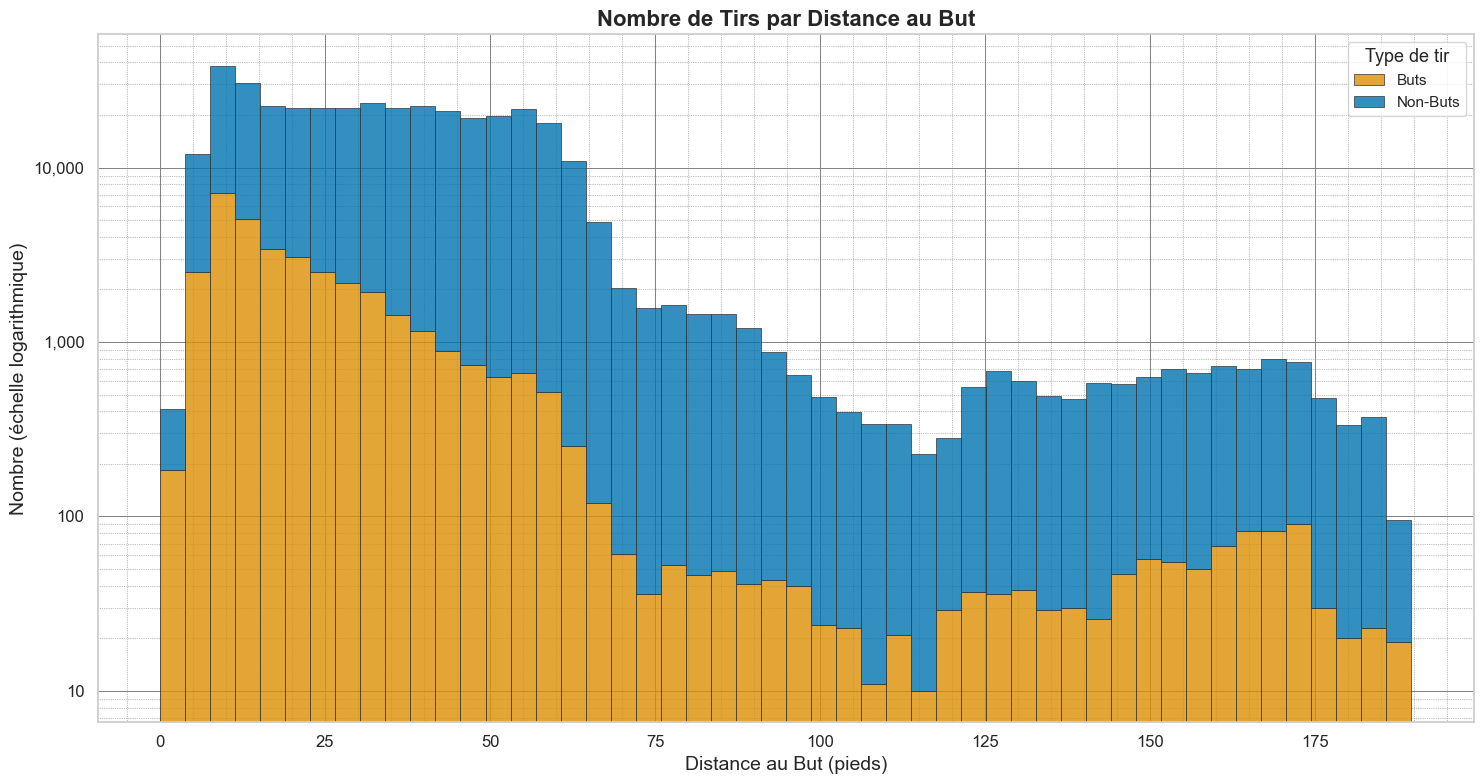

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import warnings

warnings.filterwarnings("ignore")

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a color palette that is colorblind friendly
palette = sns.color_palette("colorblind")

# Create a figure and an axis
plt.figure(figsize=(15, 8))

# Create a histogram with a hue and colorblind-friendly palette
ax = sns.histplot(
    data=data, 
    x='distance_to_goal', 
    hue='is_goal', 
    bins=50, 
    multiple='stack', 
    palette=palette,  # Apply the colorblind-friendly palette here
    edgecolor='0.2',
    linewidth=0.5,
    alpha=0.8
)

ax.legend(labels=["Buts", "Non-Buts"], title='Type de tir', title_fontsize='13', fontsize='11')

# Add major and minor grid lines
ax.grid(which='major', color='grey', linewidth=0.7)
ax.grid(which='minor', color='grey', linestyle=':', linewidth=0.5)
ax.minorticks_on()

# Adjust y-axis scale to symlog due to large range of y-values
ax.set_yscale('log')

# Adding some labels and title with French translations
ax.set_title('Nombre de Tirs par Distance au But', fontsize=16, fontweight='bold')
ax.set_xlabel('Distance au But (pieds)', fontsize=14)
ax.set_ylabel('Nombre (échelle logarithmique)', fontsize=14)

# Setting the x and y axis labels formats using French locale style if necessary
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Set the tick parameters for axes
ax.tick_params(axis='both', which='major', labelsize=12)

# Display the plot
plt.tight_layout()  # Adjust the padding between and around subplots.
plt.show()

# Un histogramme de nombre de tirs (buts et non-buts séparés), binned par angle

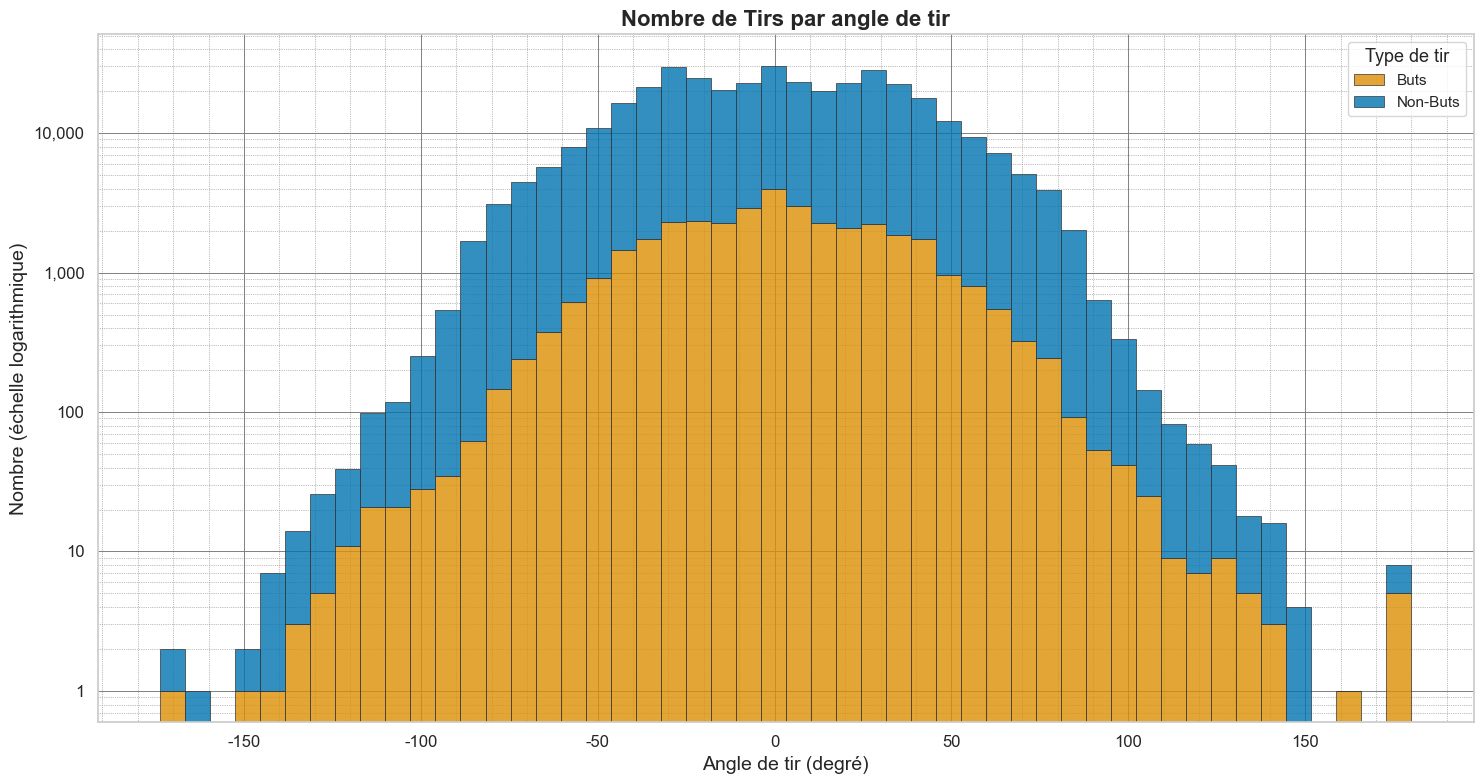

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import warnings

warnings.filterwarnings("ignore")

# Assuming your dataframe is named data

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a color palette that is colorblind friendly
palette = sns.color_palette("colorblind")

# Create a figure and an axis
plt.figure(figsize=(15, 8))

# Create a histogram with a hue and colorblind-friendly palette
ax = sns.histplot(
    data=data, 
    x='angle_to_goal', 
    hue='is_goal', 
    bins=50, 
    multiple='stack', 
    palette=palette,  # Apply the colorblind-friendly palette here
    edgecolor='0.2',
    linewidth=0.5,
    alpha=0.8
)

ax.legend(labels=["Buts", "Non-Buts"], title='Type de tir', title_fontsize='13', fontsize='11')

# Add major and minor grid lines
ax.grid(which='major', color='grey', linewidth=0.7)
ax.grid(which='minor', color='grey', linestyle=':', linewidth=0.5)
ax.minorticks_on()

# Adjust y-axis scale to symlog due to large range of y-values
ax.set_yscale('log')

# Adding some labels and title with French translations
ax.set_title('Nombre de Tirs par angle de tir', fontsize=16, fontweight='bold')
ax.set_xlabel('Angle de tir (degré)', fontsize=14)
ax.set_ylabel('Nombre (échelle logarithmique)', fontsize=14)

# Setting the x and y axis labels formats using French locale style if necessary
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Set the tick parameters for axes
ax.tick_params(axis='both', which='major', labelsize=12)

# Display the plot
plt.tight_layout()  # Adjust the padding between and around subplots.
plt.show()

# Histogramme 2D où un axe est la distance et l'autre est l'angle. Vous n'avez pas besoin de séparer les buts et les non-buts.

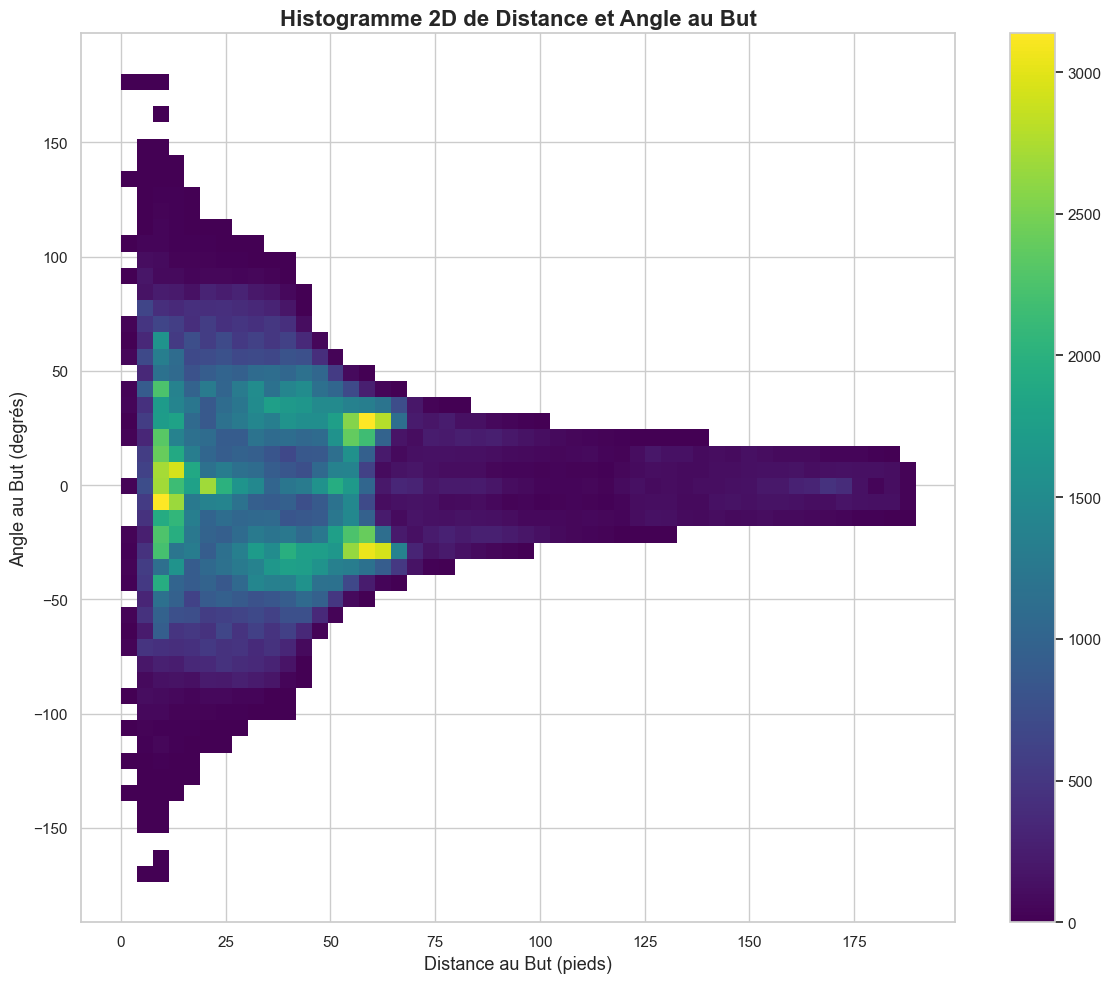

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataframe is named data
# And the 'angle_to_goal' column contains the angle information

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure and an axis
plt.figure(figsize=(12, 10))

# Create a 2D histogram (heatmap) with 'distance_to_goal' on x-axis and 'angle_to_goal' on y-axis
ax = sns.histplot(
    data=data, 
    x='distance_to_goal', 
    y='angle_to_goal', 
    bins=50,  # You can adjust the number of bins for finer or coarser resolution
    cbar=True,  # This adds a colorbar to the side of the heatmap
    cmap='viridis'  # This is a colorblind-friendly color map
)

# Adding some labels and title
ax.set_title('Histogramme 2D de Distance et Angle au But', fontsize=16, fontweight='bold')
ax.set_xlabel('Distance au But (pieds)', fontsize=13)
ax.set_ylabel('Angle au But (degrés)', fontsize=13)

# Display the plot
plt.tight_layout()  # Adjust the padding between and around subplots.
plt.show()